In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [3]:
df.shape

(100, 3)

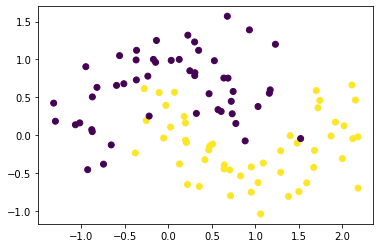

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# model with relu
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 0.34715962, -0.7315819 ],
        [ 0.7275944 ,  1.1222202 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.1856042 ],
        [-0.59455884]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 90ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.4250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.3750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [15]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.00274425], dtype=float32)]

3888/3888 [==============================] - 4s 1ms/step


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

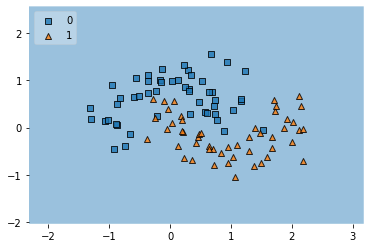

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

In [17]:
# model with tanh
model = Sequential()
model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [18]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 69ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [22]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.0007546], dtype=float32)]

3888/3888 [==============================] - 4s 1ms/step


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

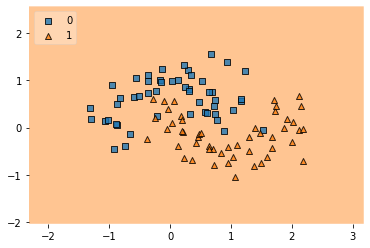

In [23]:
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

In [24]:
# model with sigmoid
model = Sequential()
model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [25]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [26]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 68ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 16ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6914 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [28]:
model.get_weights()

[array([[-0.45119917, -0.45119917],
        [ 0.47568884,  0.47568884]], dtype=float32),
 array([-0.01310444, -0.01310444], dtype=float32),
 array([[-0.10431944],
        [-0.10431944]], dtype=float32),
 array([0.01325834], dtype=float32)]

- If initial weights are zeros then sigmoid function, will all neuron to a single perceptron and with same weight
- Inner way it doesnot capture non linearity of data

3888/3888 [==============================] - 4s 984us/step


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

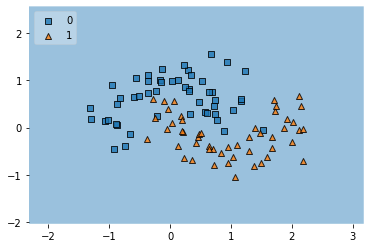

In [29]:
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

# All weight and bias are same and constant

In [30]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.get_weights()

[array([[ 0.93864  , -0.8346423],
        [-1.1905763,  1.2140034]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.0198656 ],
        [-0.45197505]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
initial_weights = model.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [33]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 67ms/step - loss: 0.8634 - accuracy: 0.5000 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8611 - accuracy: 0.5000 - val_loss: 0.8341 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8589 - accuracy: 0.5000 - val_loss: 0.8320 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8569 - accuracy: 0.5000 - val_loss: 0.8300 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8548 - accuracy: 0.5000 - val_loss: 0.8279 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8529 - accuracy: 0.5000 - val_loss: 0.8259 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8507 - accuracy: 0.5000 - val_loss: 0.8240 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 18ms/step - loss: 0.7667 - accuracy: 0.5000 - val_loss: 0.7460 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7655 - accuracy: 0.5000 - val_loss: 0.7449 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7643 - accuracy: 0.5000 - val_loss: 0.7439 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7630 - accuracy: 0.5000 - val_loss: 0.7428 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7621 - accuracy: 0.5000 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7609 - accuracy: 0.5000 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7599 - accuracy: 0.5000 - val_loss: 0.7398 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [35]:
model.get_weights()

[array([[0.70867354, 0.70867354],
        [0.2453224 , 0.2453224 ]], dtype=float32),
 array([0.277712, 0.277712], dtype=float32),
 array([[0.2689681],
        [0.2689681]], dtype=float32),
 array([0.25550777], dtype=float32)]

- If initial weights and bias are same and constant in all activation function, will all neuron to a single perceptron and with same weight
- Inner way it doesnot capture non linearity of data

3888/3888 [==============================] - 4s 999us/step


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

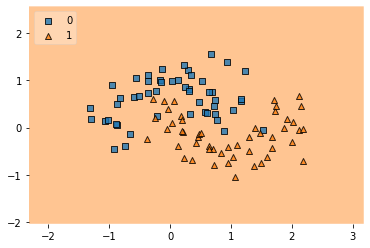

In [36]:
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

# All weight and bias are random and very very small

In [37]:
# model with tanh
model = Sequential()
model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.get_weights()

[array([[ 0.56836987,  0.33687067],
        [-0.2152332 ,  0.58493423]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.19208443, -1.1695915 ],
        [ 1.1664051 , -1.096453  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8307704 , -0.47744977],
        [-0.29970175,  1.0567621 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.22234726,  0.6177324 ],
        [-0.26046604, -0.3953995 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.08723998],
        [-1.2520884 ]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
initial_weights = model.get_weights()

In [40]:
model.get_weights()[0].shape[0]

2

In [41]:
model.get_weights()[0].shape[1]

2

In [42]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [43]:
model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.01494612, -0.00445669],
        [ 0.00318879, -0.01114223]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00423764,  0.00345116],
        [-0.02070719, -0.0047235 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01566997,  0.00681032],
        [ 0.00341957,  0.008094  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.005744  ,  0.02929357],
        [ 0.0165002 , -0.00957158]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01569549],
        [-0.00330889]], dtype=float32),
 array([0.], dtype=float32)]

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [45]:
model.get_weights()

[array([[ 0.01495293, -0.00553912],
        [ 0.00318233, -0.01010219]], dtype=float32),
 array([-2.1880032e-06, -1.3958987e-05], dtype=float32),
 array([[-0.00373357,  0.00402178],
        [-0.02047987, -0.00446577]], dtype=float32),
 array([0.00050819, 0.0001112 ], dtype=float32),
 array([[-0.0156253 ,  0.00583598],
        [ 0.00340289,  0.00818681]], dtype=float32),
 array([-0.00221347,  0.00114181], dtype=float32),
 array([[-0.00341351,  0.02870135],
        [ 0.00977078, -0.01172929]], dtype=float32),
 array([ 1.2294749e-03, -1.9408868e-05], dtype=float32),
 array([[ 2.7324606e-03],
        [-8.7868160e-05]], dtype=float32),
 array([0.01022722], dtype=float32)]

3888/3888 [==============================] - 8s 2ms/step


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

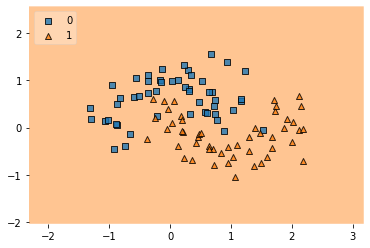

In [46]:
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

https://www.deeplearning.ai/ai-notes/initialization/index.html
    

# All weight and bias are random and very very large

In [47]:
# model with tanh
model = Sequential()
model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2)                 6         
                                                                 
 dense_14 (Dense)            (None, 2)                 6         
                                                                 
 dense_15 (Dense)            (None, 2)                 6         
                                                                 
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [48]:
initial_weights = model.get_weights()

In [49]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [50]:
model.get_weights()

[array([[ 0.15023851, -0.17861557],
        [-0.2308976 , -0.11202013]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.42658448, 0.23168075],
        [1.0573865 , 0.11667693]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.048998  , 0.3270892 ],
        [0.45091617, 0.3324579 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5757373 , -0.36255455],
        [ 1.0339378 ,  0.7495059 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.264696 ],
        [-1.4009666]], dtype=float32),
 array([0.], dtype=float32)]

In [51]:
model.set_weights(initial_weights)
model.get_weights()

[array([[ 0.48209238,  0.26470706],
        [-1.3049176 , -0.22582544]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6201188 , -1.2328755 ],
        [-0.10699721, -0.3736283 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3542567 , -1.0919589 ],
        [ 0.37504265, -0.29115024]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.07314825, -0.19707054],
        [ 0.7416451 , -0.13373037]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.14014189],
        [0.61585134]], dtype=float32),
 array([0.], dtype=float32)]

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=10000,validation_split=0.2,callbacks=callback)

Epoch 1/10000
3/3 [==============================] - 1s 139ms/step - loss: 0.6707 - accuracy: 0.8500 - val_loss: 0.6667 - val_accuracy: 0.8500
Epoch 2/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.6695 - accuracy: 0.8500 - val_loss: 0.6655 - val_accuracy: 0.8500
Epoch 3/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.6684 - accuracy: 0.8500 - val_loss: 0.6642 - val_accuracy: 0.8500
Epoch 4/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.6673 - accuracy: 0.8500 - val_loss: 0.6630 - val_accuracy: 0.8500
Epoch 5/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.6662 - accuracy: 0.8500 - val_loss: 0.6617 - val_accuracy: 0.8500
Epoch 6/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.6650 - accuracy: 0.8500 - val_loss: 0.6604 - val_accuracy: 0.8500
Epoch 7/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.6639 - accuracy: 0.8500 - val_loss: 0.6591 - val_accuracy: 0.8500
Epoch

3/3 [==============================] - 0s 29ms/step - loss: 0.5774 - accuracy: 0.8375 - val_loss: 0.5586 - val_accuracy: 0.9000
Epoch 59/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.5755 - accuracy: 0.8375 - val_loss: 0.5563 - val_accuracy: 0.9000
Epoch 60/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.5735 - accuracy: 0.8375 - val_loss: 0.5541 - val_accuracy: 0.9000
Epoch 61/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.5716 - accuracy: 0.8375 - val_loss: 0.5517 - val_accuracy: 0.9000
Epoch 62/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.5695 - accuracy: 0.8375 - val_loss: 0.5493 - val_accuracy: 0.9000
Epoch 63/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.5676 - accuracy: 0.8375 - val_loss: 0.5470 - val_accuracy: 0.9000
Epoch 64/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.5657 - accuracy: 0.8375 - val_loss: 0.5447 - val_accuracy: 0.9000
Epoch 65/10000

3/3 [==============================] - 0s 30ms/step - loss: 0.4739 - accuracy: 0.8500 - val_loss: 0.4339 - val_accuracy: 0.9000
Epoch 116/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.4725 - accuracy: 0.8500 - val_loss: 0.4324 - val_accuracy: 0.9000
Epoch 117/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.4713 - accuracy: 0.8500 - val_loss: 0.4307 - val_accuracy: 0.9000
Epoch 118/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.4699 - accuracy: 0.8500 - val_loss: 0.4289 - val_accuracy: 0.9000
Epoch 119/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.4685 - accuracy: 0.8500 - val_loss: 0.4273 - val_accuracy: 0.9000
Epoch 120/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4673 - accuracy: 0.8500 - val_loss: 0.4256 - val_accuracy: 0.9000
Epoch 121/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4661 - accuracy: 0.8500 - val_loss: 0.4240 - val_accuracy: 0.9000
Epoch 12

3/3 [==============================] - 0s 24ms/step - loss: 0.4245 - accuracy: 0.8500 - val_loss: 0.3690 - val_accuracy: 0.9000
Epoch 173/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4241 - accuracy: 0.8500 - val_loss: 0.3684 - val_accuracy: 0.9000
Epoch 174/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.4235 - accuracy: 0.8500 - val_loss: 0.3674 - val_accuracy: 0.9000
Epoch 175/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.4230 - accuracy: 0.8500 - val_loss: 0.3664 - val_accuracy: 0.9000
Epoch 176/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.4226 - accuracy: 0.8500 - val_loss: 0.3654 - val_accuracy: 0.9000
Epoch 177/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.4221 - accuracy: 0.8500 - val_loss: 0.3650 - val_accuracy: 0.9000
Epoch 178/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4216 - accuracy: 0.8500 - val_loss: 0.3644 - val_accuracy: 0.9000
Epoch 17

3/3 [==============================] - 0s 29ms/step - loss: 0.4054 - accuracy: 0.8500 - val_loss: 0.3384 - val_accuracy: 0.9000
Epoch 230/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.4052 - accuracy: 0.8500 - val_loss: 0.3381 - val_accuracy: 0.9000
Epoch 231/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4051 - accuracy: 0.8500 - val_loss: 0.3373 - val_accuracy: 0.9000
Epoch 232/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.4049 - accuracy: 0.8500 - val_loss: 0.3366 - val_accuracy: 0.9000
Epoch 233/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4046 - accuracy: 0.8500 - val_loss: 0.3364 - val_accuracy: 0.9000
Epoch 234/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.4044 - accuracy: 0.8500 - val_loss: 0.3358 - val_accuracy: 0.9000
Epoch 235/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.4043 - accuracy: 0.8500 - val_loss: 0.3352 - val_accuracy: 0.9000
Epoch 23

3/3 [==============================] - 0s 25ms/step - loss: 0.3976 - accuracy: 0.8500 - val_loss: 0.3214 - val_accuracy: 0.9000
Epoch 287/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.3975 - accuracy: 0.8500 - val_loss: 0.3213 - val_accuracy: 0.9000
Epoch 288/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.3973 - accuracy: 0.8500 - val_loss: 0.3215 - val_accuracy: 0.9000
Epoch 289/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.3972 - accuracy: 0.8500 - val_loss: 0.3215 - val_accuracy: 0.9000
Epoch 290/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.3972 - accuracy: 0.8500 - val_loss: 0.3214 - val_accuracy: 0.9000
Epoch 291/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.3970 - accuracy: 0.8500 - val_loss: 0.3214 - val_accuracy: 0.9000
Epoch 292/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.3970 - accuracy: 0.8500 - val_loss: 0.3212 - val_accuracy: 0.9000
Epoch 29

3/3 [==============================] - 0s 26ms/step - loss: 0.3933 - accuracy: 0.8500 - val_loss: 0.3100 - val_accuracy: 0.9000
Epoch 344/10000
3/3 [==============================] - 0s 35ms/step - loss: 0.3932 - accuracy: 0.8500 - val_loss: 0.3100 - val_accuracy: 0.9000
Epoch 345/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.3932 - accuracy: 0.8500 - val_loss: 0.3099 - val_accuracy: 0.9000
Epoch 346/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.3931 - accuracy: 0.8500 - val_loss: 0.3098 - val_accuracy: 0.9000
Epoch 347/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.3930 - accuracy: 0.8500 - val_loss: 0.3094 - val_accuracy: 0.9000
Epoch 348/10000
3/3 [==============================] - 0s 38ms/step - loss: 0.3931 - accuracy: 0.8500 - val_loss: 0.3090 - val_accuracy: 0.9000
Epoch 349/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.3930 - accuracy: 0.8500 - val_loss: 0.3088 - val_accuracy: 0.9000
Epoch 35

3/3 [==============================] - 0s 24ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.3041 - val_accuracy: 0.9000
Epoch 401/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.3040 - val_accuracy: 0.9000
Epoch 402/10000
3/3 [==============================] - 0s 30ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.3037 - val_accuracy: 0.9000
Epoch 403/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.3035 - val_accuracy: 0.9000
Epoch 404/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3904 - accuracy: 0.8500 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 405/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.3903 - accuracy: 0.8500 - val_loss: 0.3025 - val_accuracy: 0.9000
Epoch 406/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.3903 - accuracy: 0.8500 - val_loss: 0.3018 - val_accuracy: 0.9000
Epoch 40

3/3 [==============================] - 0s 35ms/step - loss: 0.3884 - accuracy: 0.8500 - val_loss: 0.2969 - val_accuracy: 0.9000
Epoch 458/10000
3/3 [==============================] - 0s 40ms/step - loss: 0.3883 - accuracy: 0.8500 - val_loss: 0.2968 - val_accuracy: 0.9000
Epoch 459/10000
3/3 [==============================] - 0s 27ms/step - loss: 0.3883 - accuracy: 0.8500 - val_loss: 0.2968 - val_accuracy: 0.9000
Epoch 460/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3883 - accuracy: 0.8500 - val_loss: 0.2968 - val_accuracy: 0.9000
Epoch 461/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.3883 - accuracy: 0.8500 - val_loss: 0.2968 - val_accuracy: 0.9000
Epoch 462/10000
3/3 [==============================] - 0s 37ms/step - loss: 0.3883 - accuracy: 0.8500 - val_loss: 0.2965 - val_accuracy: 0.9000
Epoch 463/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3882 - accuracy: 0.8500 - val_loss: 0.2963 - val_accuracy: 0.9000
Epoch 46

3/3 [==============================] - 0s 23ms/step - loss: 0.3868 - accuracy: 0.8500 - val_loss: 0.2920 - val_accuracy: 0.9000
Epoch 515/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.3868 - accuracy: 0.8500 - val_loss: 0.2920 - val_accuracy: 0.9000
Epoch 516/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.3868 - accuracy: 0.8500 - val_loss: 0.2920 - val_accuracy: 0.9000
Epoch 517/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.3867 - accuracy: 0.8500 - val_loss: 0.2919 - val_accuracy: 0.9000
Epoch 518/10000
3/3 [==============================] - 0s 34ms/step - loss: 0.3867 - accuracy: 0.8500 - val_loss: 0.2919 - val_accuracy: 0.9000
Epoch 519/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.3866 - accuracy: 0.8500 - val_loss: 0.2918 - val_accuracy: 0.9000
Epoch 520/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.3867 - accuracy: 0.8500 - val_loss: 0.2918 - val_accuracy: 0.9000
Epoch 52

3/3 [==============================] - 0s 24ms/step - loss: 0.3855 - accuracy: 0.8500 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 572/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.3854 - accuracy: 0.8500 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 573/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3854 - accuracy: 0.8500 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 574/10000
3/3 [==============================] - 0s 31ms/step - loss: 0.3854 - accuracy: 0.8500 - val_loss: 0.2896 - val_accuracy: 0.9000
Epoch 575/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.3854 - accuracy: 0.8500 - val_loss: 0.2896 - val_accuracy: 0.9000
Epoch 576/10000
3/3 [==============================] - 0s 35ms/step - loss: 0.3855 - accuracy: 0.8500 - val_loss: 0.2892 - val_accuracy: 0.9000
Epoch 577/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.3854 - accuracy: 0.8500 - val_loss: 0.2891 - val_accuracy: 0.9000
Epoch 57

3/3 [==============================] - 0s 25ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.2889 - val_accuracy: 0.9000
Epoch 629/10000
3/3 [==============================] - 0s 29ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.2891 - val_accuracy: 0.9000
Epoch 630/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3845 - accuracy: 0.8500 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 631/10000
3/3 [==============================] - 0s 36ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 632/10000
3/3 [==============================] - 0s 28ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.2893 - val_accuracy: 0.9000
Epoch 633/10000
3/3 [==============================] - 0s 32ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 634/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.3845 - accuracy: 0.8500 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 63

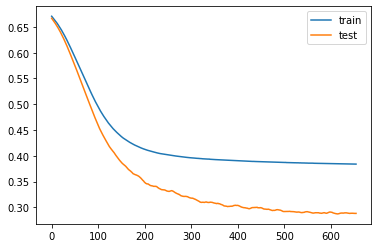

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

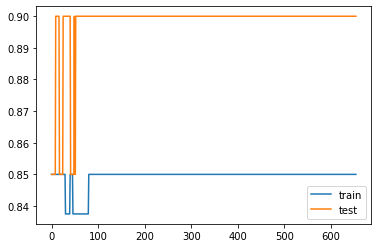

In [55]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

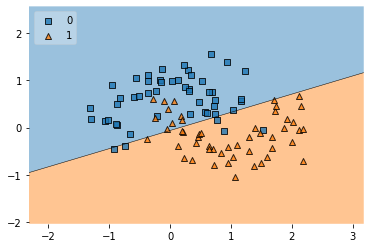

In [56]:
plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)

- For Too large weight initialization convergence occur at higher epochs